<a href="https://colab.research.google.com/github/gjhernandezp/AT/blob/master/ConcentrationEEGDrivingSimulationExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## H2o  Auto ML GLMs models

In [ ]:
!pip install h2o

import h2o
h2o.init()
from h2o.automl import H2OAutoML
import pandas as pd
import numpy as np

X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX.csv')
y = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARY.csv')

train = X.join(y)
print('train ', train.shape)


train_h = h2o.H2OFrame(train)
train_h["Genero"] = train_h["Genero"].asfactor()
train_h["Estrato"] = train_h["Estrato"].asfactor()
train_h["NivelEd"] = train_h["NivelEd"].asfactor()
train_h["Accidente"] = train_h["Accidente"].asfactor()

predictors = ["Genero","Edad","Estrato","NivelEd"]
response = "Accidente"

predictors = ["Genero","Edad","Estrato","NivelEd"]
response = "Accidente"
aml = H2OAutoML(max_models=200, 
                seed=1, 
                include_algos=["GLM"], 
                max_runtime_secs=60*10,
                nfolds = 5,
                keep_cross_validation_predictions=True)
aml.train(x=predictors, y=response, training_frame=train_h)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,8 mins 57 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_unknownUser_r9akic
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.171 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


train  (167, 8)
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20221006_125721


GLM Model: summary
    family    link    regularization            lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.342 )  nlambda = 30, lambda.max = 3.1586, lambda.min = 0.342, lambda.1se = 3.1586  15                            15                             14                      AutoML_2_20221006_125721_training_py_11_sid_9851

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1384063769975468
RMSE: 0.3720300753938407
LogLoss: 0.44825266757136323
AUC: 0.6156217882836588
AUCPR: 0.8585850684375819
Gini: 0.23124357656731753
Null degrees of freedom: 166
Residual degrees of freedom: 151
Null deviance: 151.02272736705305
Residual deviance: 149.71639096883533
AIC: 181.71639096883533

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8168476908030722
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      5    23   0.8214   (23.0/28.0)
1      2    137  0.0144   (2.0/139.0)
Total  7    160  0.1497   (25.0/167.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.816848     0.916388  127
max f2                       0.806194     0.963939  132
max f0point5                 0.816848     0.879332  127
max accuracy                 0.816848     0.850299  127
max precision                0.854999     1         0
max recall                   0.806194     1         132
max specificity              0.854999     1         0
max absolute_mcc             0.816848     0.306059  127
max min_per_class_accuracy   0.83082      0.607143  73
max mean_per_class_accuracy  0.832293     0.641316  65
max tns                      0.854999     28        0
max fns                      0.854999     138       0
max fps                      0.799241     28        134
max tps                      0.806194     139       132
max tnr                      0.854999     1         0
max fnr                      0.854999     0.992806  0
max fpr                      0.799241     1         134
max tpr                      0.806194     1         132

Gains/Lift Table: Avg response rate: 83.23 %, avg score: 83.23 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.011976                    0.85296            0.600719  0.600719           0.5              0.854489  0.5                         0.854489            0.00719424      0.00719424                 -39.9281  -39.9281           -0.02852
2        0.0239521                   0.851419           0.600719  0.600719           0.5              0.852177  0.5                         0.853333            0.00719424      0.0143885                  -39.9281  -39.9281           -0.0570401
3        0.0299401                   0.848786           1.20144   0.720863           1                0.850358  0.6                         0.852738            0.00719424      0.0215827                  20.1439   -27.9137           -0.0498458
4       

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20221006_125721


GLM Model: summary
    family    link    regularization            lambda_search                                                               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ------------------------  --------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.342 )  nlambda = 30, lambda.max = 3.1586, lambda.min = 0.342, lambda.1se = 3.1586  15                            15                             14                      AutoML_2_20221006_125721_training_py_11_sid_9851

ModelMetricsBinomialGLM: gl

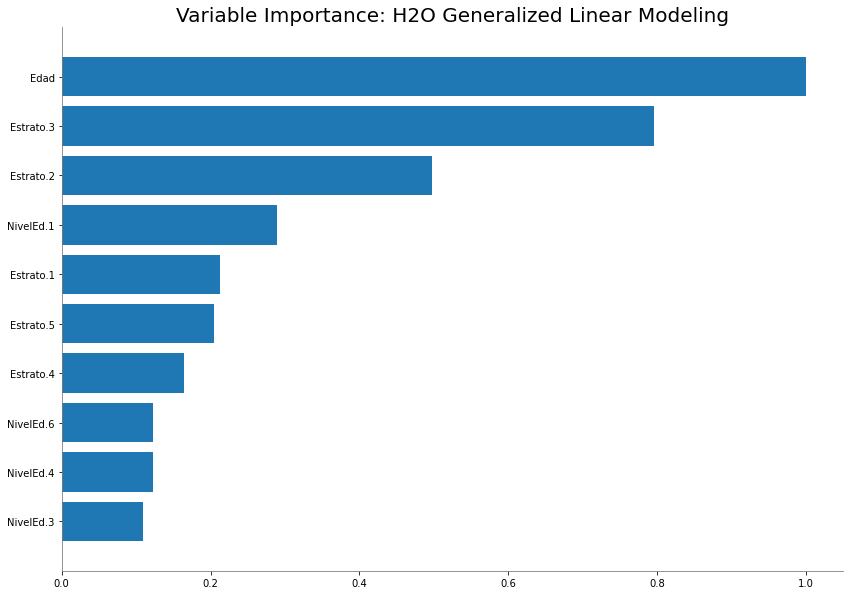

<Figure size 432x288 with 0 Axes>

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader.predict(train_h)

aml.leader.save_mojo()

print(aml.leader)

print("Actual")
actual = np.array(train[response])
print(actual)

pred_df = aml.leader.predict(train_h)
predicted = np.array(pred_df.as_data_frame()["predict"])
print("predicted")
print(predicted)

print("Prediction Accuracy")
count = 0
for i in range(len(predicted)): 
    if predicted[i] == actual[i]:
       count= count+1
print(count/len(predicted))

print("MSE")
np.sum(np.square(np.array(train[response])-predicted))/len(predicted)

aml.leader.varimp_plot()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_6_20221006_131051


GLM Model: summary
    family    link    regularization              lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.02121 )  nlambda = 30, lambda.max = 16.715, lambda.min = 0.02121, lambda.1se = 1.8097  16                            16                       

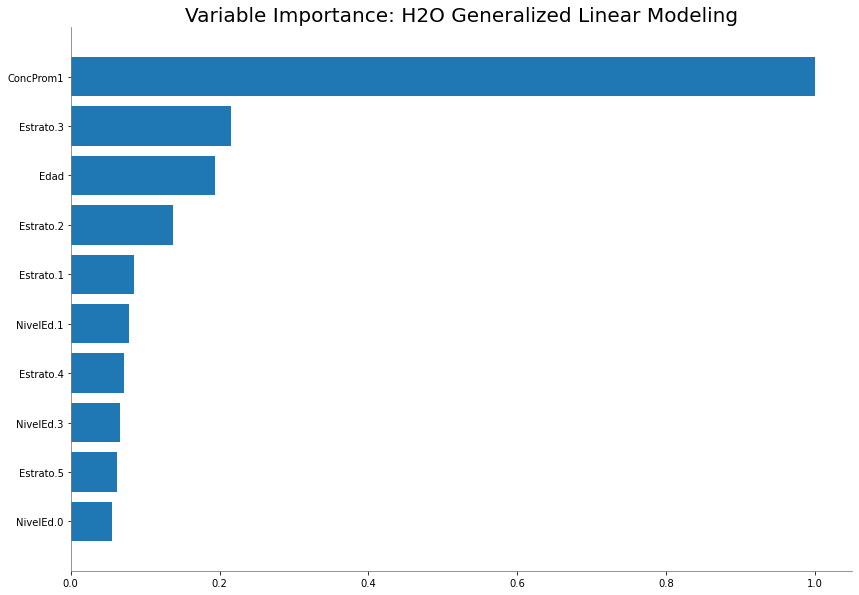

<Figure size 432x288 with 0 Axes>

In [ ]:
predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm1"]
response = "Accidente"

aml = H2OAutoML(max_models=200, 
                seed=1, 
                include_algos=["GLM"], 
                max_runtime_secs=60*10,
                nfolds = 5,
                keep_cross_validation_predictions=True)
aml.train(x=predictors, y=response, training_frame=train_h)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader.predict(train_h)

aml.leader.save_mojo()

print(aml.leader)

print("Actual")
actual = np.array(train[response])
print(actual)

pred_df = aml.leader.predict(train_h)
predicted = np.array(pred_df.as_data_frame()["predict"])
print("predicted")
print(predicted)

print("Prediction Accuracy")
count = 0
for i in range(len(predicted)): 
    if predicted[i] == actual[i]:
       count= count+1
print(count/len(predicted))

print("MSE")
np.sum(np.square(np.array(train[response])-predicted))/len(predicted)

aml.leader.varimp_plot()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_7_20221006_131108


GLM Model: summary
    family    link    regularization              lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.03107 )  nlambda = 30, lambda.max = 17.822, lambda.min = 0.03107, lambda.1se = 1.0223  17                            17                       

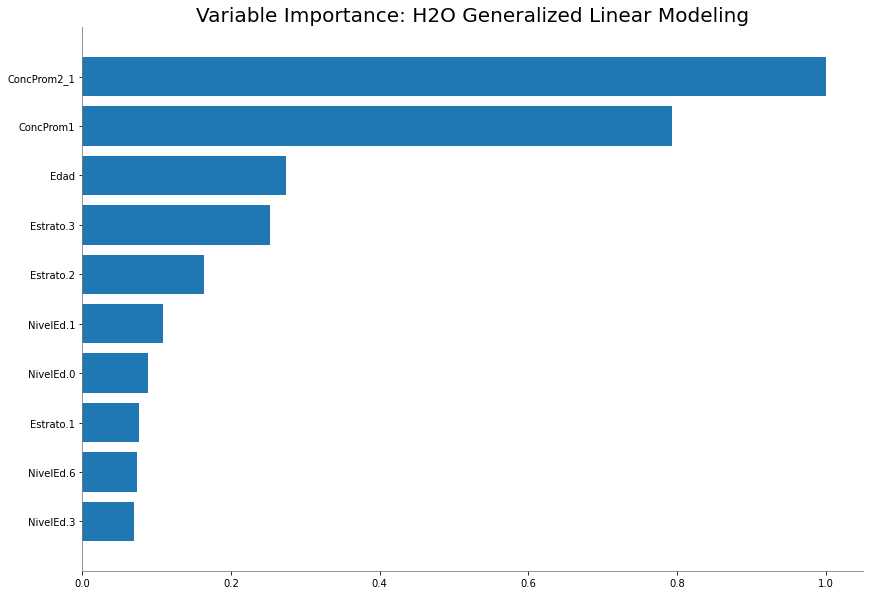

<Figure size 432x288 with 0 Axes>

In [ ]:
predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm1","ConcProm2_1"]
response = "Accidente"

aml = H2OAutoML(max_models=200, 
                seed=1, 
                include_algos=["GLM"], 
                max_runtime_secs=60*10,
                nfolds = 5,
                keep_cross_validation_predictions=True)
aml.train(x=predictors, y=response, training_frame=train_h)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader.predict(train_h)

aml.leader.save_mojo()

print(aml.leader)

print("Actual")
actual = np.array(train[response])
print(actual)

pred_df = aml.leader.predict(train_h)
predicted = np.array(pred_df.as_data_frame()["predict"])
print("predicted")
print(predicted)

print("Prediction Accuracy")
count = 0
for i in range(len(predicted)): 
    if predicted[i] == actual[i]:
       count= count+1
print(count/len(predicted))

print("MSE")
np.sum(np.square(np.array(train[response])-predicted))/len(predicted)

aml.leader.varimp_plot()

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_9_20221006_131146


GLM Model: summary
    family    link    regularization              lambda_search                                                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 0.04269 )  nlambda = 30, lambda.max = 17.822, lambda.min = 0.04269, lambda.1se = 1.9295  18                            18                       

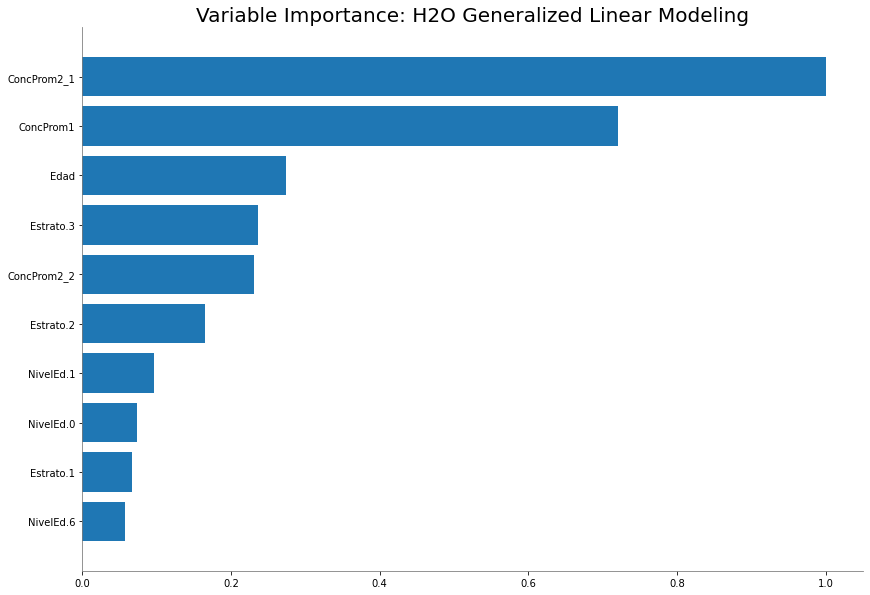

<Figure size 432x288 with 0 Axes>

In [ ]:
predictors = ["Genero","Edad","Estrato","NivelEd","ConcProm1","ConcProm2_1","ConcProm2_2"]
response = "Accidente"

aml = H2OAutoML(max_models=200, 
                seed=1, 
                include_algos=["GLM"], 
                max_runtime_secs=60*10,
                nfolds = 5,
                keep_cross_validation_predictions=True)
aml.train(x=predictors, y=response, training_frame=train_h)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)
aml.leader.predict(train_h)

aml.leader.save_mojo()

print(aml.leader)

print("Actual")
actual = np.array(train[response])
print(actual)

pred_df = aml.leader.predict(train_h)
predicted = np.array(pred_df.as_data_frame()["predict"])
print("predicted")
print(predicted)

print("Prediction Accuracy")
count = 0
for i in range(len(predicted)): 
    if predicted[i] == actual[i]:
       count= count+1
print(count/len(predicted))

print("MSE")
np.sum(np.square(np.array(train[response])-predicted))/len(predicted)

aml.leader.varimp_plot()

## DecisionTreeClassifier 50 nodes found by TPOT

In [7]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import warnings

X = pd.read_csv('https://raw.githubusercontent.com/gjhernandezp/ConcDriversML/master/WARX.csv')
y = pd.read_csv('https://raw.githubusercontent.com/Juanp77gitH/Wilson/main/Y5BMAS.csv')
names = list(X.columns)

model_tree = DecisionTreeClassifier (max_leaf_nodes = 43).fit(X,y)

from sklearn.metrics import confusion_matrix,classification_report
print("Actual")
actual =np.array(y).reshape((-1,))
print(actual)

predicted = model_tree.predict(X)
print(predicted)
print(model_tree.score(X,y))

predicted = model_tree.predict(X)
print("confusion_matrix")
print(confusion_matrix(y, predicted))
print("classification_report")
print(classification_report(y, predicted))


warnings.filterwarnings('ignore')



cross_val5 = cross_val_score(model_tree, X, y, scoring='accuracy', cv=5)
print("cross_val5")
print(cross_val5)
print("cross_val5.mean")
print(cross_val5.mean())

cross_val10 = cross_val_score(model_tree, X, y, scoring='accuracy', cv=10)
print("cross_val10")
print(cross_val10)
print("cross_val10.mean")
print(cross_val10.mean())

Actual
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
[1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0]
1.0
confusion_matrix
[[119   0]
 [  0  48]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        48

    accuracy                           1.00       167
   macro avg       1.00      

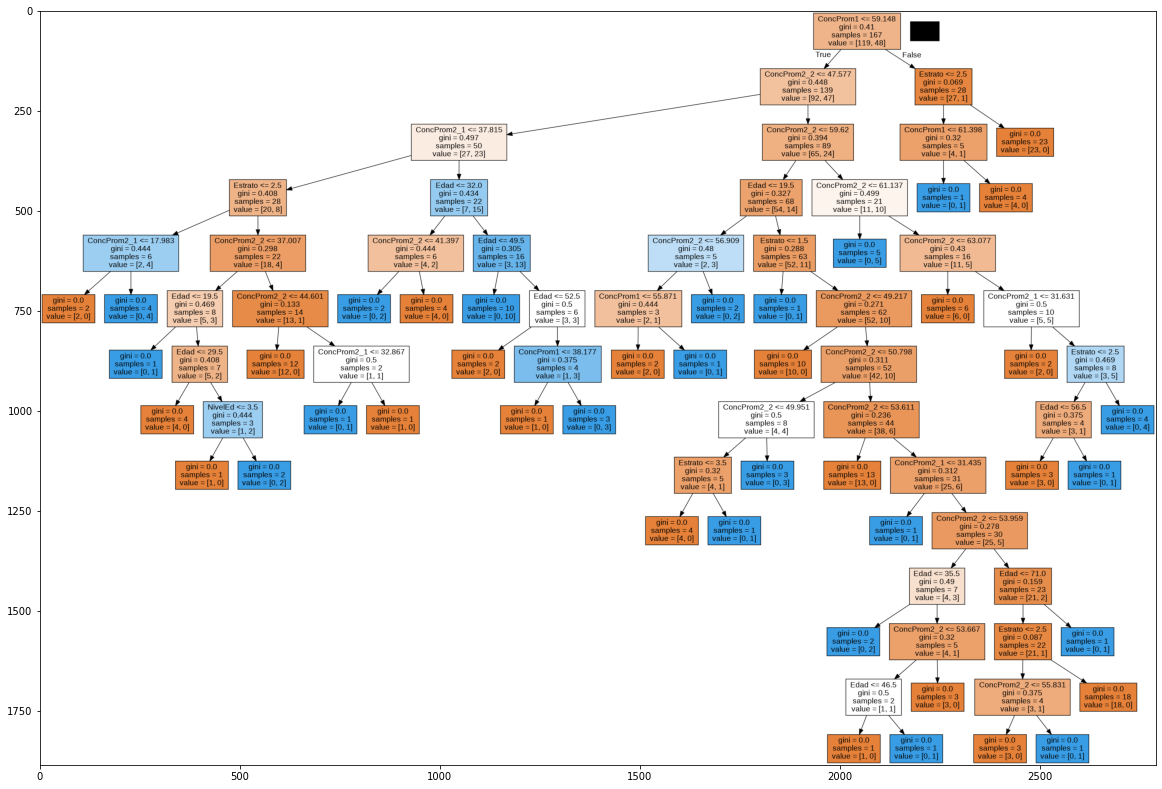

In [8]:
from IPython.display import Image  
from sklearn import tree
import matplotlib.image as mpimg
import pydotplus
import io
import matplotlib.pyplot as plt

import sys
str1 = "/usr/local/Cellar/graphviz/2.40.1_1/bin/"
sys.path.append(str1)

dot_data = io.StringIO()
tree.export_graphviz(model_tree, out_file=dot_data, filled=True, feature_names = names )

# Draw graph
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png('dt.png')

plt.figure(figsize=(20, 20))
img = mpimg.imread('dt.png')
imgplot = plt.imshow(img)

plt.show()